Steps for linear regression  
1. Read the dataset                   
2. EDA, FE                
3. divide dataset into independent and dependent features
4. further divide dataset into train test 
(import train_test_split)
5. standard Scaling
6. Model training

In [3]:
import numpy as np   
import matplotlib.pyplot as plt          
import pandas as pd      
import seaborn as sns 

In [4]:
df=pd.read_csv('height-weight.csv')           

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

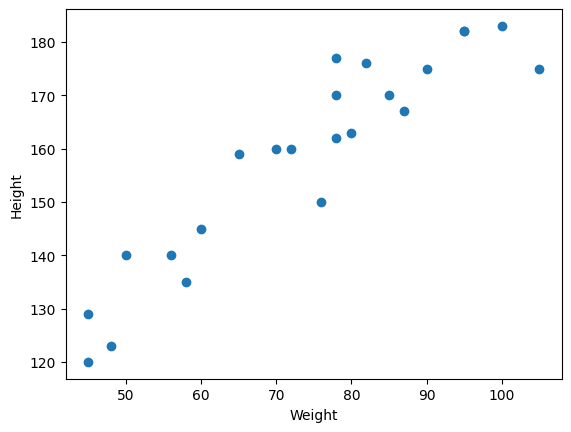

In [6]:
plt.scatter(x='Weight',y='Height',data=df)
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

dividing dataset into dependent and independent features

In [9]:
X=df[['Weight']]         #independent feature
y=df[['Height']]         #dependent feature

In [10]:
X.shape,y.shape    

((23, 1), (23, 1))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
X_train.shape,X_test.shape 

((18, 1), (5, 1))

In [14]:
y_train.shape,y_test.shape

((18, 1), (5, 1))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar=StandardScaler()

In [17]:
X_train=scalar.fit_transform(X_train)

In [18]:
X_test=scalar.transform(X_test)

In [19]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

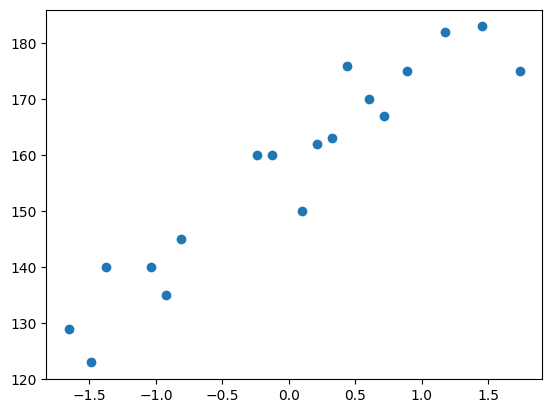

In [20]:
plt.scatter(X_train,y_train)

In [21]:
#MOdel TRain
from sklearn.linear_model import LinearRegression

In [22]:
regression=LinearRegression()

In [23]:
#Training  the train data
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
regression.intercept_

array([157.5])

In [25]:
regression.coef_

array([[17.03440872]])

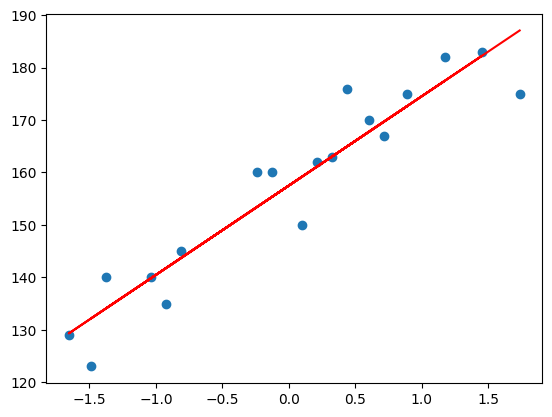

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

prediction of train data
1. predicted height output= intercept+coef
2. y_pred_test=157.5+170.3(X_test)

In [29]:
## prediction of test data
y_pred_test=regression.predict(X_test)


In [30]:
y_pred_test

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

In [31]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


Performance Metrics MAE,MSE,RMSE

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [36]:
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


#Accuracy of model (r square)

In [37]:
from sklearn.metrics import r2_score

In [39]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

Adjusted r square

In [40]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [42]:
scalar

StandardScaler()